In [1]:
import torch
import os
import glob
import matplotlib.pyplot as plt

import queue

import threading

from tqdm.notebook import tqdm

from collections import namedtuple

import time

import random

In [2]:
import cv2 
import numpy as np
from PIL import Image

In [3]:
import torch
import torch.functional as F
import torch.nn as nn

In [4]:
Batch = namedtuple('batch', ('before', 'after'))

In [5]:
emoticon_file_list = glob.glob('resource/*.png')
emoticon_file_list.sort()

In [6]:
# Remove white images

for file in tqdm(emoticon_file_list):
    
    image = cv2.imread(file)
    
    if np.min(image) == 255:
        print(file)
        image = image[:, :, (2, 1, 0)]
        plt.figure()
        plt.imshow(image)
        plt.show()
        os.remove(file)

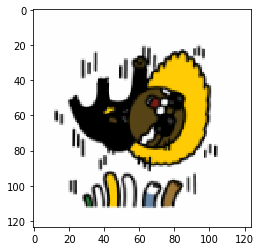

In [7]:
file = np.random.choice(emoticon_file_list)
    
image = cv2.imread(file)
image = image[:, :, (2, 1, 0)]
image = image / 2 ** 8

plt.figure()
plt.imshow(image)
plt.show()

In [8]:
def punch_image(image, p=0.1):
    
    bool_mask = np.random.choice((True, False), image.shape[1:3], True, (1-p, p))
    bool_mask = np.stack([bool_mask, bool_mask, bool_mask], axis=0)
    
    punched_image= np.where(bool_mask, image, np.ones(image.shape))
    
    return punched_image

In [9]:
from scipy.ndimage import gaussian_filter

def blur_image(image, sigma=0.5):
    
    bool_mask = np.random.choice((True, False), image.shape[1:3], True, (1-p, p))
    
    punched_image= np.where(bool_mask, image, np.ones(image.shape))
    
    return blurred_image

0.0
9.611745368910316e-05
0.029571520695112066
0.06449295818687344
0.0869207441130175
0.10359427183525456
0.11645702388615474
0.12676887350402166


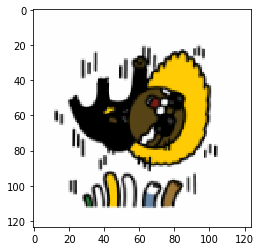

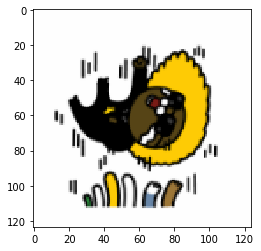

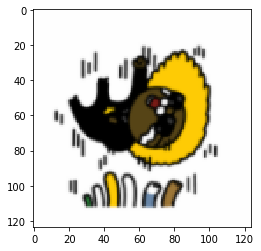

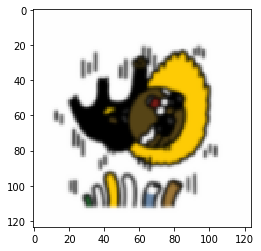

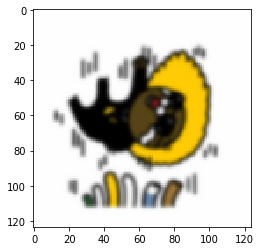

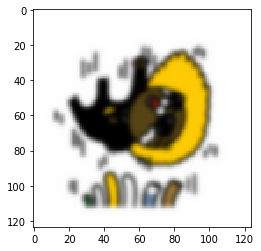

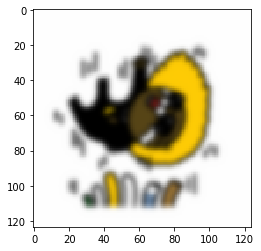

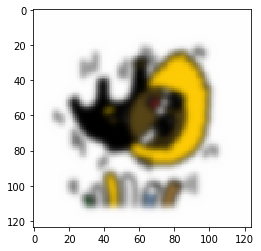

In [10]:
last_blurred_image = image

for sigma in np.arange(0, 2, 0.25):
    blurred_image = gaussian_filter(image, sigma = (sigma, sigma, 0))
    plt.figure()
    plt.imshow(blurred_image)
    
    print(np.std(image - blurred_image))

In [11]:
def make_seed_image(image):
    
    bool_mask = np.random.choice((True, False), image.shape[1:3], True, (1-p, p))
    bool_mask = np.stack([bool_mask, bool_mask, bool_mask], axis=0)
    
    punched_image= np.where(bool_mask, image, np.ones(image.shape))
    
    return seed_image

In [12]:
seed_pos = image.shape[0], image.shape[1]

In [13]:
width = image.shape[0]
height = image.shape[1]

seed_pos = (np.random.randint(1/3 * width, 2/3 * width), np.random.randint(1/3 * height, 2/3 * height))

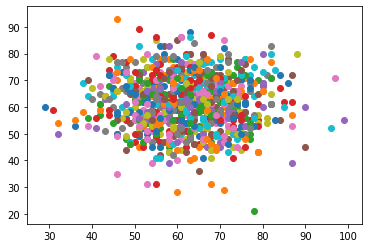

In [14]:
plt.figure()
for i in range(1000):
#     seed_pos = (np.random.randint(1/3 * width, 2/3 * width), np.random.randint(1/3 * height, 2/3 * height))
    seed_pos = (int(np.random.normal(width/2, width/12)), int(np.random.normal(height/2, height/12)))
    plt.scatter(*seed_pos)
plt.show()

In [15]:
image.shape

(124, 124, 3)

In [16]:
image[seed_pos]

array([0.984375  , 0.78515625, 0.0234375 ])

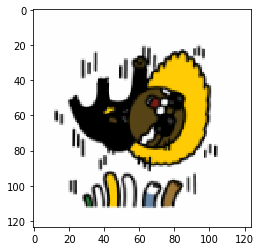

In [17]:
plt.imshow(image)

In [18]:
def create_cross_mask(size):
    
    assert size % 2 == 1, 'Cross mask supports only odd sized matrix'
    
    mask_matrix = np.zeros((size, size), dtype=bool)
    
    center = np.array((size // 2, size // 2))
    
    for point in [np.array((i, j)) for i in range(size) for j in range(size)]:
        if np.sum(np.fabs(center - point)) <= size // 2:
            mask_matrix[point[0], point[1]] = True
    
    return mask_matrix

In [32]:
# mask_list = [create_cross_mask(i) for i in range(1, 121, 2)]
mask_list = [create_cross_mask(i) for i in range(7, 7 + 4 * 50, 4)]

# for size in range(1, 27, 2):
#     plt.figure()
#     plt.imshow(create_cross_mask(size))

# plt.show()

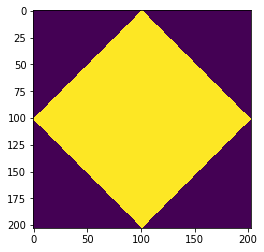

In [33]:
plt.imshow(mask_list[-1])

In [34]:
seed_pos = (int(np.random.normal(width/2, width/12)), int(np.random.normal(height/2, height/12)))

In [35]:
np.floor(909 * 4 / 16) + np.floor(909 * 7 / 16)

624.0

In [36]:
def apply_mask_to_image(image, mask_matrix, offset=(0, 0)):
    
    image_length = image.shape[0] // 2
    mask_length = mask_matrix.shape[0]
    mask_half_length = mask_length // 2
    
    full_mask = np.zeros((image.shape[0] + mask_length, \
                          image.shape[1] + mask_length), dtype=bool)
    
    center = (full_mask.shape[0] // 2, full_mask.shape[1] // 2)
    
    x_min = center[0] + offset[0] - mask_half_length
    x_max = center[0] + offset[0] + mask_half_length + 1
    y_min = center[1] + offset[1] - mask_half_length
    y_max = center[1] + offset[1] + mask_half_length + 1
    
    full_mask[x_min:x_max,y_min:y_max] = mask_matrix
    full_mask = full_mask[center[0] - image_length:center[0] + image_length,
                          center[0] - image_length:center[0] + image_length]
    
    bool_mask = np.stack([full_mask, full_mask, full_mask], axis=2)
    
    masked_image= np.where(bool_mask, image, np.ones(image.shape), )
    
    return masked_image
    
    

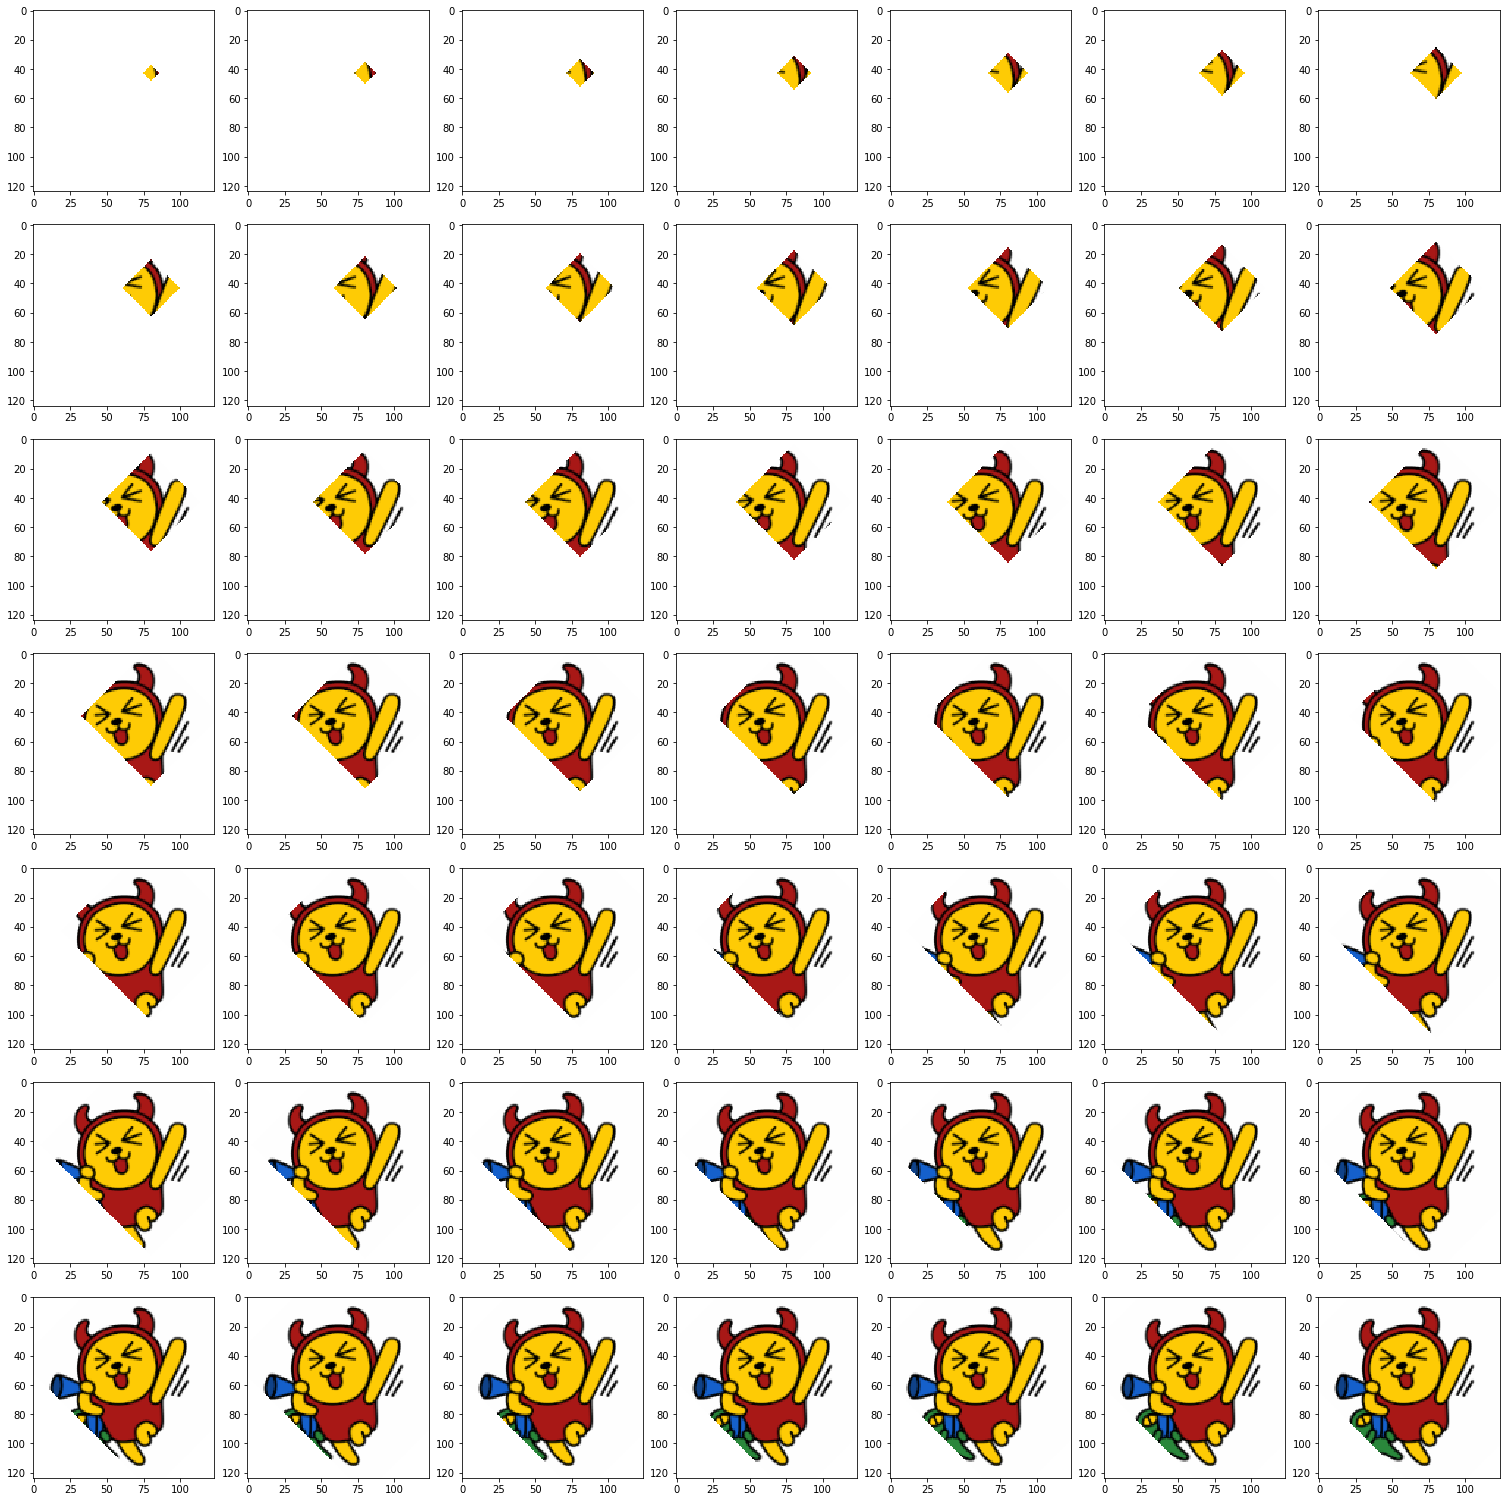

In [46]:
file = np.random.choice(emoticon_file_list)
    
image = cv2.imread(file)
image = image[:, :, (2, 1, 0)]
image = image / 2 ** 8

# plt.figure()
# plt.imshow(image)
# plt.show()

fig, axes = plt.subplots(7, 7, figsize=(21, 21))

axes = axes.flatten()

seed_pos = (int(np.random.normal(0, width/6)), int(np.random.normal(0, height/6)))

for i, mask in enumerate(mask_list[-49:]):
# for i, mask in enumerate(mask_list[:25]):
    axes[i].imshow(apply_mask_to_image(image, mask, seed_pos))
    
plt.tight_layout()
plt.show()